In [1]:
import pandas as pd

In [2]:
AI = pd.read_csv('AI_Resume_Screening.csv')

In [3]:
AIrD = pd.DataFrame(AI)

# dont need resume id or name
AIrD = AIrD.drop(labels=['Resume_ID', 'Name'], axis=1)

# ----- education
AIrD['Education'] = AIrD['Education'].astype(str).str.strip().str.lower()

education_mapping = {
    'b.sc': 1,
    'b.tech': 2,
    'btech': 2,        # just in case
    'mba': 3,
    'm.tech': 4,
    'phd': 5
}

AIrD['Education'] = AIrD['Education'].map(education_mapping)

AIrD = AIrD.dropna(subset=['Education'])

# ----- recruiter decision: 1 hired 0 rejected
AIrD['Recruiter Decision'] = AIrD['Recruiter Decision'].astype(str).str.strip().str.lower()

AIrD['Recruiter Decision'] = AIrD['Recruiter Decision'].map({
    'hire': 1,
    'reject': 0
})

AIrD = AIrD.dropna(subset=['Recruiter Decision'])

AIrD = AIrD.reset_index(drop=True)

AIrD

,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,"TensorFlow, NLP, Pytorch",10,1,NaN,AI Researcher,1,104895,8,100
1,"Deep Learning, Machine Learning, Python, SQL",10,3,Google ML,Data Scientist,1,113002,1,100
2,"Ethical Hacking, Cybersecurity, Linux",1,3,Deep Learning Specialization,Cybersecurity Analyst,1,71766,7,70
3,"Python, Pytorch, TensorFlow",7,2,AWS Certified,AI Researcher,1,46848,0,95
4,"SQL, React, Java",4,5,NaN,Software Engineer,1,87441,9,100
...,...,...,...,...,...,...,...,...,...
995,"Cybersecurity, Linux, Ethical Hacking",0,1,NaN,Cybersecurity Analyst,0,114364,9,60
996,"Deep Learning, Machine Learning",0,3,Deep Learning Specialization,Data Scientist,0,103294,5,45
997,"TensorFlow, NLP",0,2,Google ML,AI Researcher,1,113855,9,65
998,"Linux, Networking, Cybersecurity, Ethical Hacking",8,5,AWS Certified,Cybersecurity Analyst,1,83146,10,100


In [6]:
AIrD.to_csv('cleaned_AI_resume_data.csv', index=False)

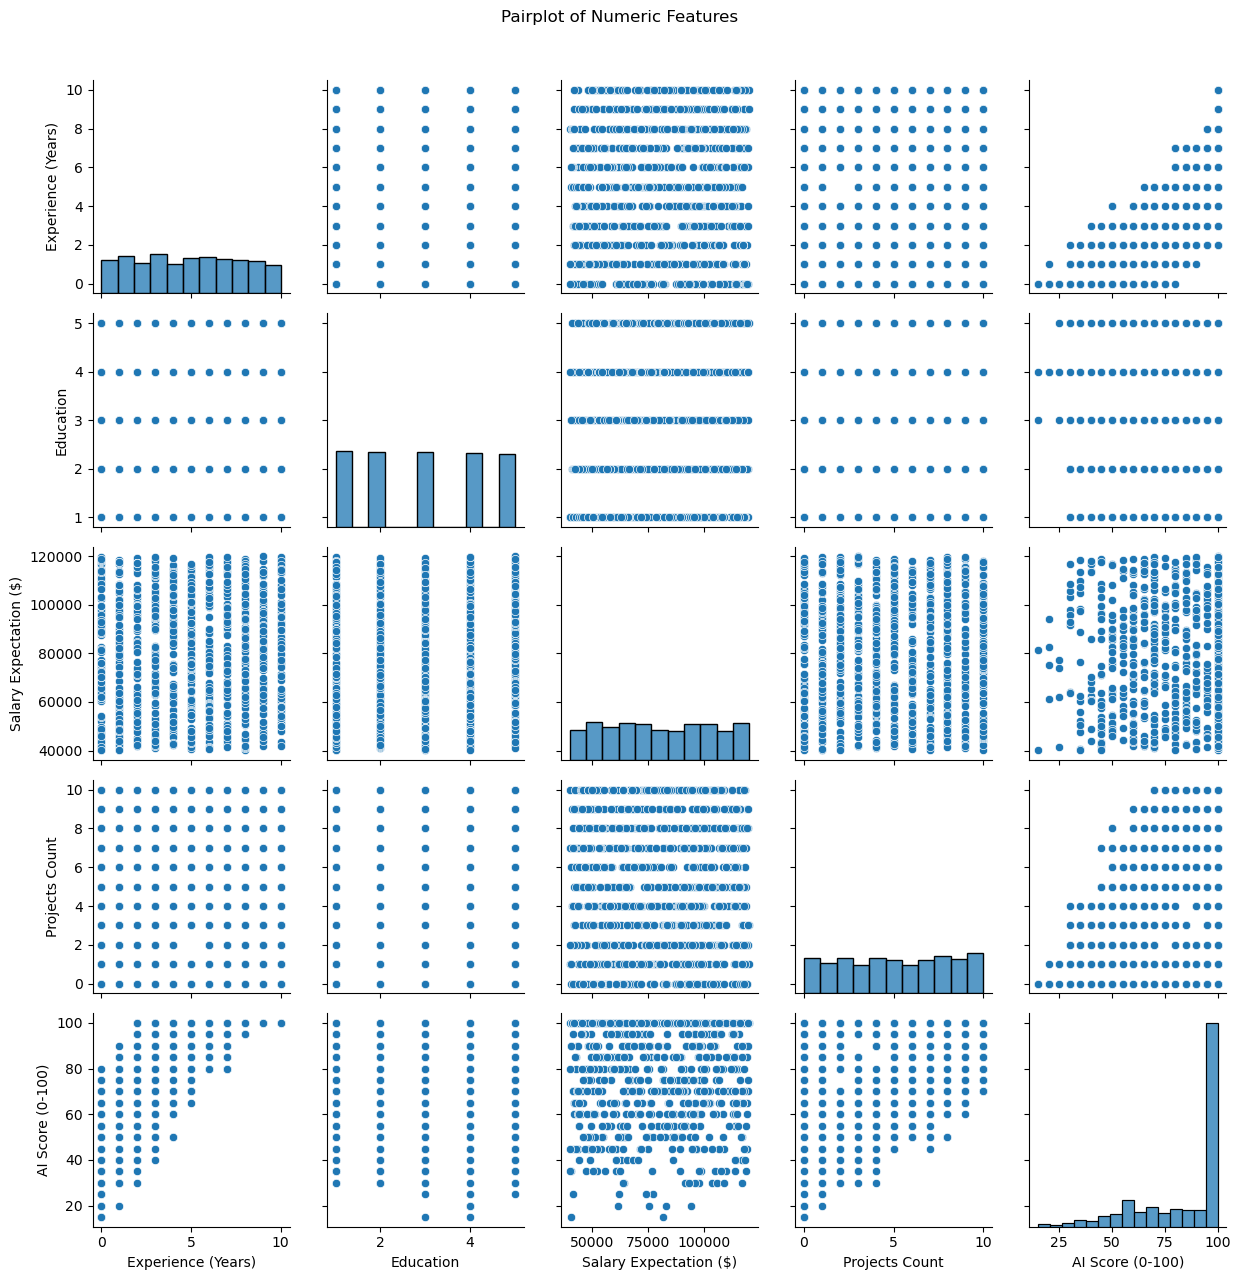

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the DataFrame
df = pd.DataFrame(AIrD)

# Select numeric columns for pairplot
numeric_columns = ['Experience (Years)', 'Education', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']

# Create pairplot
sns.pairplot(df[numeric_columns])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()


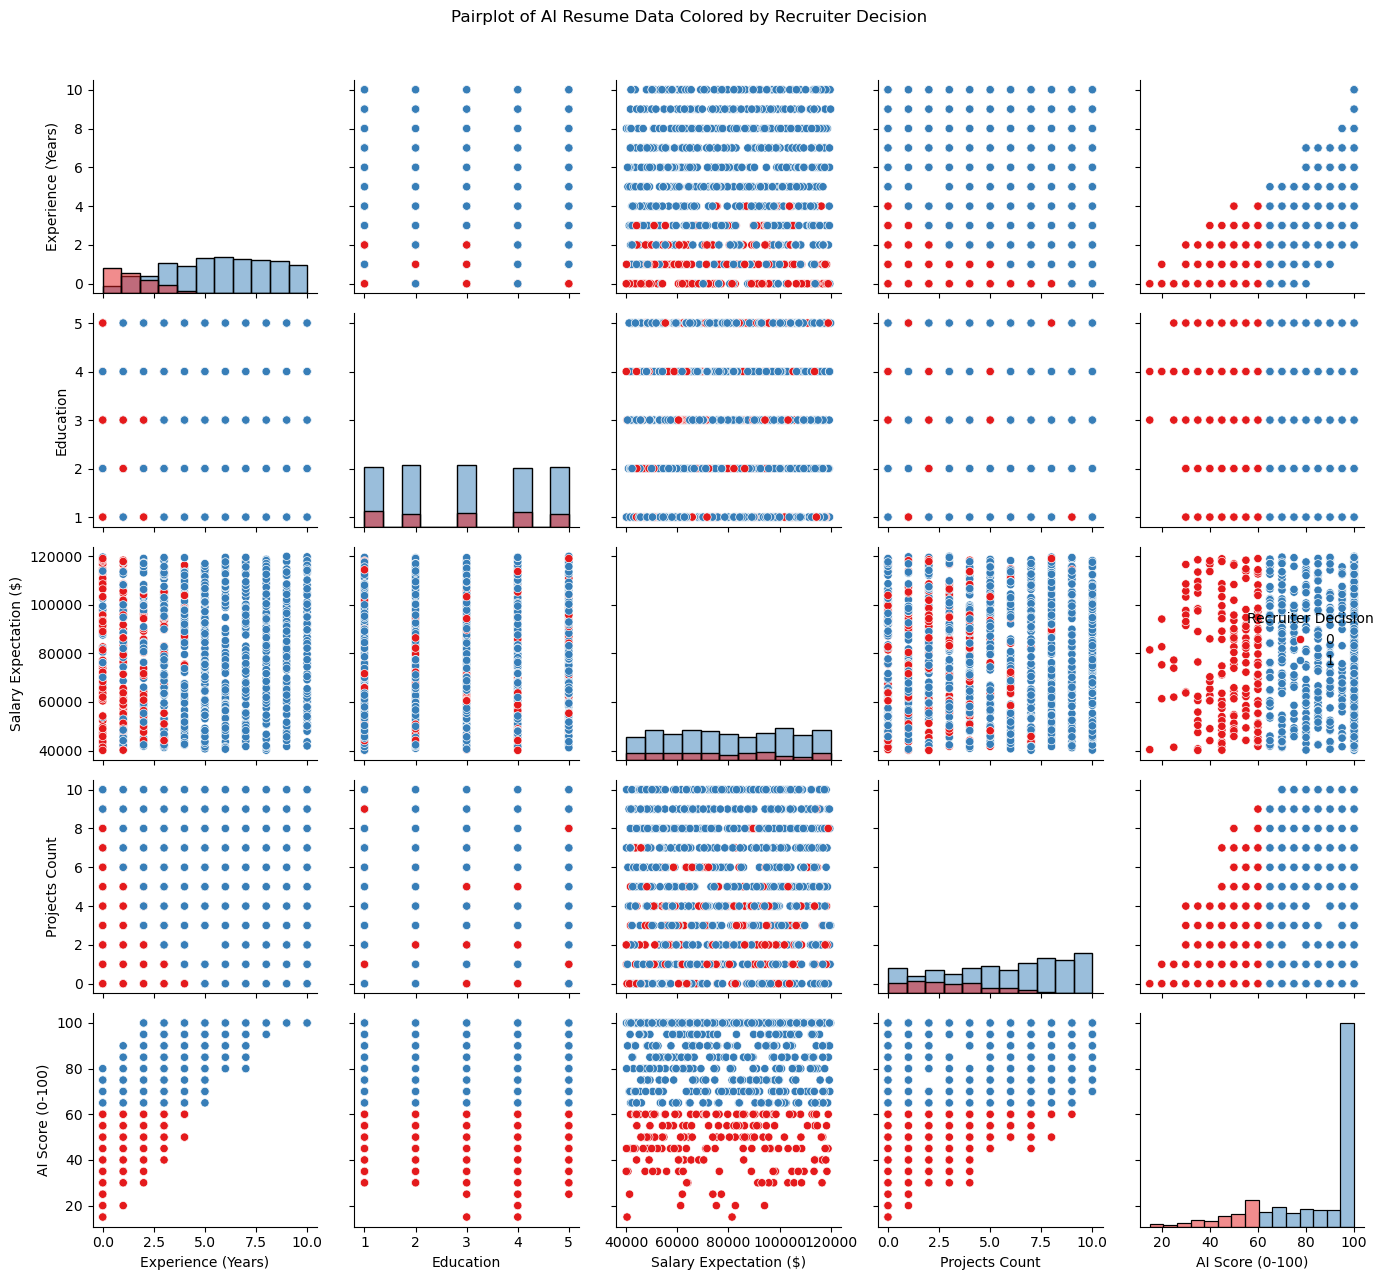

In [6]:
# Recreate the pairplot using the AIrD DataFrame with the actual column names
# Assuming AIrD is already defined in the environment, using only relevant numeric columns

# Select numeric columns
numeric_cols = ['Experience (Years)', 'Education', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']

# Generate pairplot
sns.pairplot(
    AIrD,
    vars= numeric_cols,
    hue='Recruiter Decision',
    palette='Set1',
    diag_kind='hist'
)
plt.suptitle("Pairplot of AI Resume Data Colored by Recruiter Decision", y=1.02)
plt.tight_layout()
plt.show()

In [9]:
import plotly.express as px

fig = px.scatter(
    AIrD, 
    x='AI Score (0-100)', 
    y='Salary Expectation ($)',
    color='Recruiter Decision',
    hover_data=['Experience (Years)', 'Education', 'Projects Count'],
    title='Interactive: AI Score vs Salary'
)
fig.show()

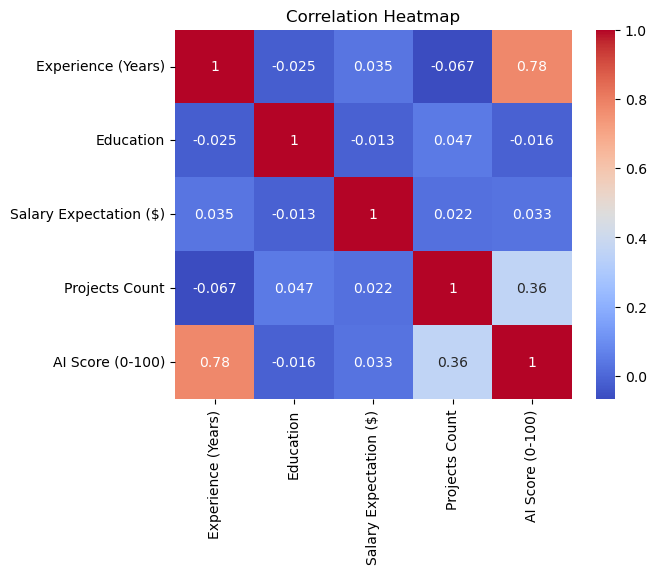

In [7]:
corr = AIrD[['Experience (Years)', 'Education', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [8]:
AIrD.groupby('Recruiter Decision').mean(numeric_only=True)


,Experience (Years),Education,Salary Expectation ($),Projects Count,AI Score (0-100)
Recruiter Decision,,,,,
0,1.170213,2.936170,77884.414894,2.909574,47.313830
1,5.758621,2.987685,80483.024631,5.647783,92.432266
